In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import glob

path = "../data/*.csv"
files = glob.glob(path)

df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)


In [7]:
df.head()


,u_id,name,offer_price,original_price,off_now,total_ratings,total_reviews,rating,description,item_link,created_at
0,22D33RGW,HP OMEN Ryzen 7 Octa Core AMD R7-6800H - (16 G...,99990,124283,19% off,0,0,0.0,"['AMD Ryzen 7 Octa Core Processor', '16 GB DDR...",https://www.flipkart.com/hp-omen-ryzen-7-octa-...,2022-10-01 22:45:22.436279+05:30
1,1X0V8DP0,Infinix X1 Series Core i7 10th Gen - (16 GB/51...,46990,69999,32% off,128,17,4.2,"['Intel Core i7 Processor (10th Gen)', '16 GB ...",https://www.flipkart.com/infinix-x1-series-cor...,2022-10-01 22:45:22.843280+05:30
2,EBK8ZBOF,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,33990,45990,26% off,3600,370,4.3,"['Intel Core i3 Processor (10th Gen)', '8 GB D...",https://www.flipkart.com/asus-vivobook-15-2022...,2022-10-01 22:45:23.314279+05:30
3,2UWFCQ6Z,ASUS VivoBook 15 (2022) Core i5 10th Gen - (8 ...,43990,57990,24% off,2408,211,4.3,"['Intel Core i5 Processor (10th Gen)', '8 GB D...",https://www.flipkart.com/asus-vivobook-15-2022...,2022-10-01 22:45:23.718280+05:30
4,RHHI5DCG,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,47990,70990,32% off,1209,100,4.4,"['Intel Core i5 Processor (10th Gen)', '8 GB D...",https://www.flipkart.com/asus-tuf-gaming-f15-c...,2022-10-01 22:45:24.146280+05:30


In [9]:
df.shape

(16848, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16848 entries, 0 to 16847
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   u_id            14040 non-null  object 
 1   name            16848 non-null  object 
 2   offer_price     16848 non-null  int64  
 3   original_price  16848 non-null  int64  
 4   off_now         16848 non-null  object 
 5   total_ratings   16848 non-null  int64  
 6   total_reviews   16848 non-null  int64  
 7   rating          16848 non-null  float64
 8   description     16848 non-null  object 
 9   item_link       14040 non-null  object 
 10  created_at      16848 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.4+ MB


In [13]:
df.isnull().sum()


u_id              2808
name                 0
offer_price          0
original_price       0
off_now              0
total_ratings        0
total_reviews        0
rating               0
description          0
item_link         2808
created_at           0
dtype: int64

In [15]:
df['rating'] = df['rating'].fillna(0)
df['total_ratings'] = df['total_ratings'].fillna(0)


In [17]:
df['brand'] = df['name'].str.split().str[0]


In [19]:
df['created_at'] = pd.to_datetime(df['created_at'])


In [23]:
df = df.drop(columns=['u_id', 'item_link'])


In [25]:
df.isnull().sum()

name              0
offer_price       0
original_price    0
off_now           0
total_ratings     0
total_reviews     0
rating            0
description       0
created_at        0
brand             0
dtype: int64

In [27]:
df['rating'].value_counts().sort_index()


rating
0.0    4183
1.0       2
1.6      14
1.7      17
2.0       3
2.2       1
2.4       1
2.5      11
2.7       6
2.8       6
3.0      54
3.1       3
3.2       6
3.3     150
3.4      41
3.5      50
3.6     123
3.7     569
3.8     308
3.9     405
4.0     839
4.1     869
4.2    2276
4.3    2152
4.4    1720
4.5    1110
4.6     651
4.7     499
4.8     353
4.9      60
5.0     366
Name: count, dtype: int64

In [29]:
rated_df = df[df['rating'] > 0]


In [31]:
rated_df.head()

,name,offer_price,original_price,off_now,total_ratings,total_reviews,rating,description,created_at,brand
1,Infinix X1 Series Core i7 10th Gen - (16 GB/51...,46990,69999,32% off,128,17,4.2,"['Intel Core i7 Processor (10th Gen)', '16 GB ...",2022-10-01 22:45:22.843280+05:30,Infinix
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,33990,45990,26% off,3600,370,4.3,"['Intel Core i3 Processor (10th Gen)', '8 GB D...",2022-10-01 22:45:23.314279+05:30,ASUS
3,ASUS VivoBook 15 (2022) Core i5 10th Gen - (8 ...,43990,57990,24% off,2408,211,4.3,"['Intel Core i5 Processor (10th Gen)', '8 GB D...",2022-10-01 22:45:23.718280+05:30,ASUS
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,47990,70990,32% off,1209,100,4.4,"['Intel Core i5 Processor (10th Gen)', '8 GB D...",2022-10-01 22:45:24.146280+05:30,ASUS
5,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,55990,63539,11% off,8146,851,4.5,"['AMD Ryzen 5 Hexa Core Processor', '8 GB DDR4...",2022-10-01 22:45:24.564279+05:30,HP


In [33]:
brand_price = rated_df.groupby('brand')['offer_price'].mean().sort_values()




In [36]:
brand_price.head(10)

brand
RedmiBook    34698.965517
Nokia        42501.000000
Infinix      43367.640158
realme       47810.294118
Mi           49426.312500
Lenovo       53092.721843
Vaio         53773.928571
Avita        53782.714286
DELL         57061.283883
LG           57667.200000
Name: offer_price, dtype: float64

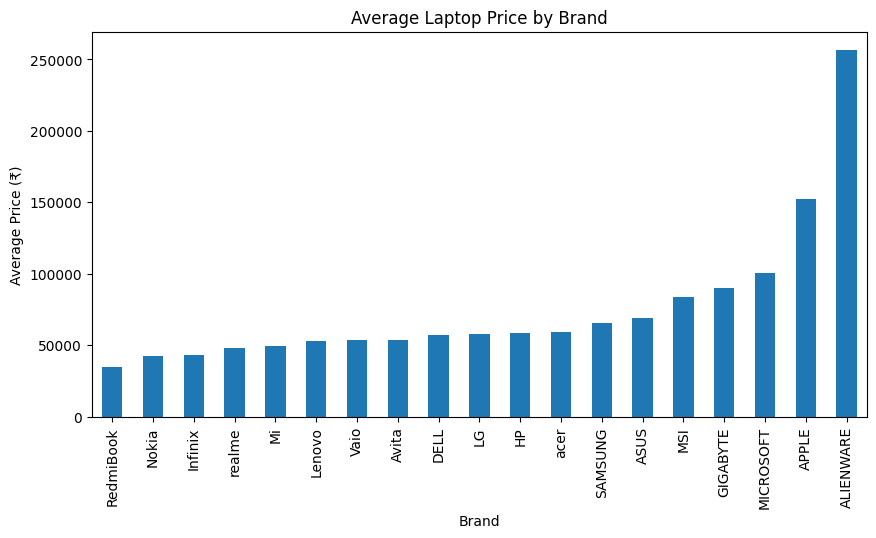

In [42]:
plt.figure(figsize=(10,5))
brand_price.plot(kind='bar')
plt.title("Average Laptop Price by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Price (₹)")
plt.show()


In [44]:
brand_rating = rated_df.groupby('brand')['rating'].mean().sort_values(ascending=False)


In [46]:
brand_rating.head(10)

brand
GIGABYTE     4.800000
APPLE        4.696657
ALIENWARE    4.414286
SAMSUNG      4.413158
MSI          4.392664
LG           4.380000
realme       4.367647
ASUS         4.345870
Mi           4.306250
HP           4.265320
Name: rating, dtype: float64

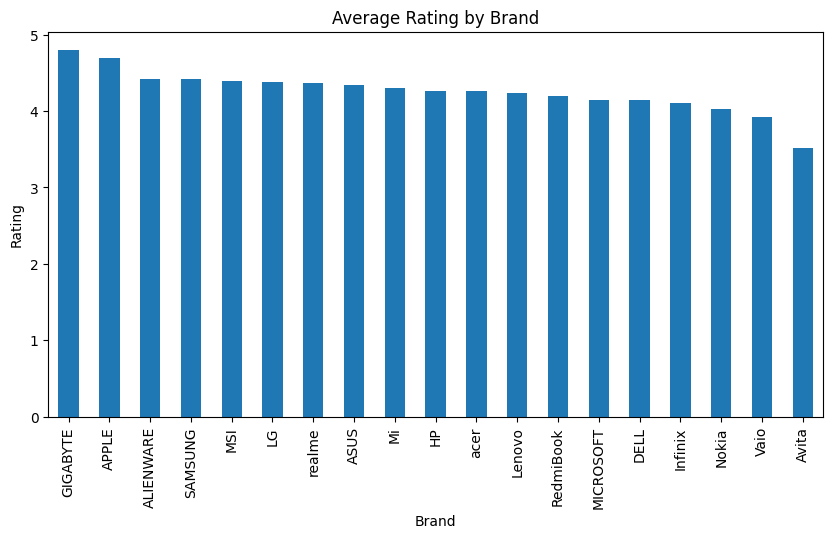

In [50]:
plt.figure(figsize=(10,5))
brand_rating.plot(kind='bar')
plt.title("Average Rating by Brand")
plt.xlabel("Brand")
plt.ylabel("Rating")
plt.show()


In [52]:
df['discount_amount'] = df['original_price'] - df['offer_price']


In [54]:
df['discount_amount']

0        24293
1        23009
2        12000
3        14000
4        23000
         ...  
16843    24109
16844      100
16845     3014
16846     1460
16847    21109
Name: discount_amount, Length: 16848, dtype: int64

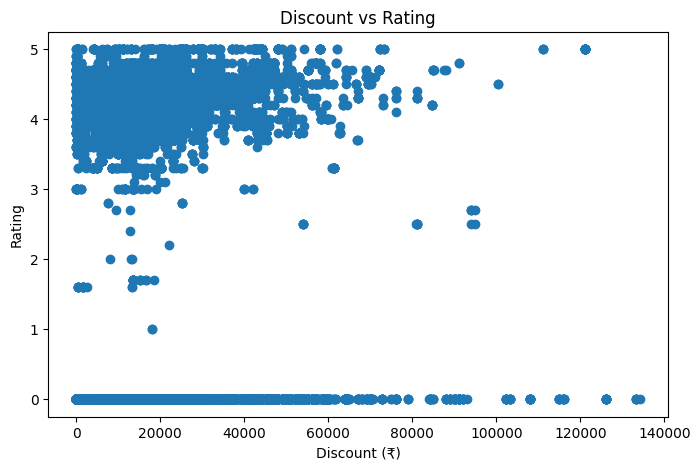

In [56]:
plt.figure(figsize=(8,5))
plt.scatter(df['discount_amount'], df['rating'])
plt.title("Discount vs Rating")
plt.xlabel("Discount (₹)")
plt.ylabel("Rating")
plt.show()


In [58]:
df['created_at'] = pd.to_datetime(df['created_at'])


In [60]:
df['created_at']

0       2022-10-01 22:45:22.436279+05:30
1       2022-10-01 22:45:22.843280+05:30
2       2022-10-01 22:45:23.314279+05:30
3       2022-10-01 22:45:23.718280+05:30
4       2022-10-01 22:45:24.146280+05:30
                      ...               
16843   2022-09-30 21:13:50.679179+05:30
16844   2022-09-30 21:13:51.605670+05:30
16845   2022-09-30 21:13:51.962663+05:30
16846   2022-09-30 21:13:52.328772+05:30
16847   2022-09-30 21:13:52.684168+05:30
Name: created_at, Length: 16848, dtype: datetime64[ns, UTC+05:30]

In [62]:
df['date'] = df['created_at'].dt.date


In [64]:
df['date']

0        2022-10-01
1        2022-10-01
2        2022-10-01
3        2022-10-01
4        2022-10-01
            ...    
16843    2022-09-30
16844    2022-09-30
16845    2022-09-30
16846    2022-09-30
16847    2022-09-30
Name: date, Length: 16848, dtype: object

In [66]:
daily_price = df.groupby('date')['offer_price'].mean()

In [68]:
daily_price.head()

date
2022-09-23    70249.155983
2022-09-24    67785.165598
2022-09-25    71072.782051
2022-09-26    74046.233974
2022-09-27    72473.276709
Name: offer_price, dtype: float64

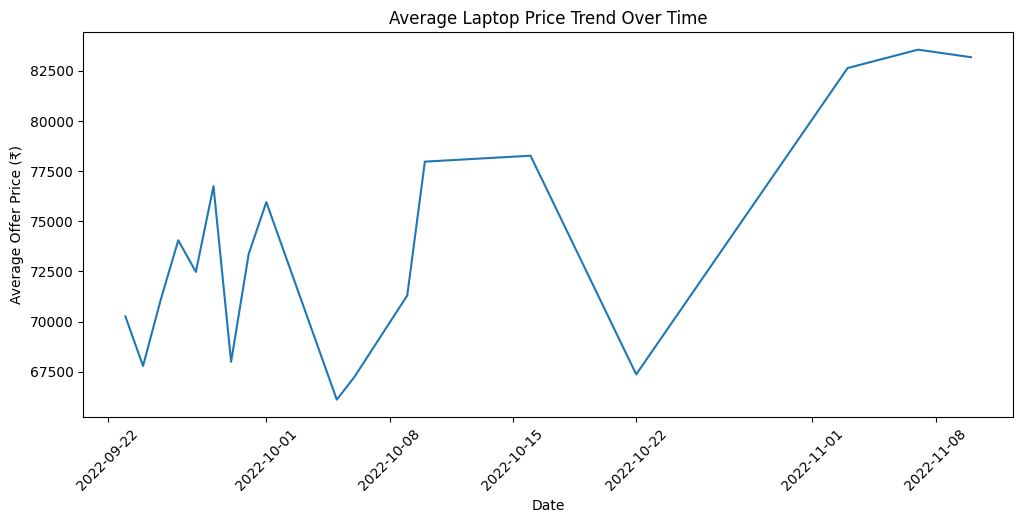

In [70]:
plt.figure(figsize=(12,5))
plt.plot(daily_price)
plt.title("Average Laptop Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Average Offer Price (₹)")
plt.xticks(rotation=45)
plt.show()

In [72]:
top_brands = df['brand'].value_counts().head(3).index

In [74]:
top_brands

Index(['ASUS', 'Lenovo', 'HP'], dtype='object', name='brand')

In [76]:
brand_df = df[df['brand'].isin(top_brands)]

In [78]:
brand_df

,name,offer_price,original_price,off_now,total_ratings,total_reviews,rating,description,created_at,brand,discount_amount,date
0,HP OMEN Ryzen 7 Octa Core AMD R7-6800H - (16 G...,99990,124283,19% off,0,0,0.0,"['AMD Ryzen 7 Octa Core Processor', '16 GB DDR...",2022-10-01 22:45:22.436279+05:30,HP,24293,2022-10-01
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,33990,45990,26% off,3600,370,4.3,"['Intel Core i3 Processor (10th Gen)', '8 GB D...",2022-10-01 22:45:23.314279+05:30,ASUS,12000,2022-10-01
3,ASUS VivoBook 15 (2022) Core i5 10th Gen - (8 ...,43990,57990,24% off,2408,211,4.3,"['Intel Core i5 Processor (10th Gen)', '8 GB D...",2022-10-01 22:45:23.718280+05:30,ASUS,14000,2022-10-01
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,47990,70990,32% off,1209,100,4.4,"['Intel Core i5 Processor (10th Gen)', '8 GB D...",2022-10-01 22:45:24.146280+05:30,ASUS,23000,2022-10-01
5,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,55990,63539,11% off,8146,851,4.5,"['AMD Ryzen 5 Hexa Core Processor', '8 GB DDR4...",2022-10-01 22:45:24.564279+05:30,HP,7549,2022-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...
16837,HP Pavilion Gaming Ryzen 5 Hexa Core 4600H - (...,69800,86900,19% off,34,6,4.6,"['AMD Ryzen 5 Hexa Core Processor', '8 GB DDR4...",2022-09-30 21:13:48.128238+05:30,HP,17100,2022-09-30
16838,ASUS Ryzen 5 Hexa Core - (8 GB/1 TB HDD/256 GB...,71245,75500,5% off,0,0,0.0,"['AMD Ryzen 5 Hexa Core Processor', '8 GB DDR4...",2022-09-30 21:13:48.688999+05:30,ASUS,4255,2022-09-30
16840,Lenovo Ryzen 3 Dual Core 8th Gen - (4 GB/512 G...,28899,39500,26% off,0,0,0.0,"['AMD Ryzen 3 Dual Core Processor (8th Gen)', ...",2022-09-30 21:13:49.510131+05:30,Lenovo,10601,2022-09-30
16841,Lenovo Yoga 7i Ryzen 7 Octa Core R7-5800U 5th ...,93465,130090,28% off,0,0,0.0,"['AMD Ryzen 7 Octa Core Processor (5th Gen)', ...",2022-09-30 21:13:49.897742+05:30,Lenovo,36625,2022-09-30


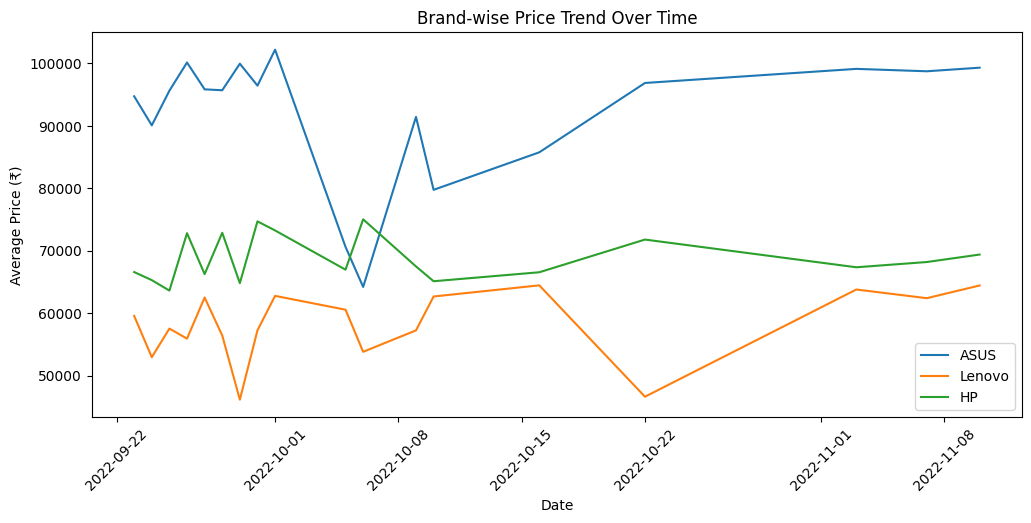

In [80]:
plt.figure(figsize=(12,5))

for brand in top_brands:
    brand_data = brand_df[brand_df['brand'] == brand]
    trend = brand_data.groupby('date')['offer_price'].mean()
    plt.plot(trend, label=brand)

plt.title("Brand-wise Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Average Price (₹)")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [82]:
df.to_csv("laptop_clean_data.csv", index=False)
